In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy

env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
import gym
import custom_gym
env = gym.make(env_name)
s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

2 1 1


C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gy

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_", evaluate=True)
agent.policy.my_np_compile()

Loading models from checkpoints/sac_checkpoint_custom_pendulum_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
import importlib
import vi_base
importlib.reload(vi_base)

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "policy":agent.policy.my_np_select_action,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)


In [7]:
vi.get_real_rollout_data()

0  1  

C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\utils\passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\utils\passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

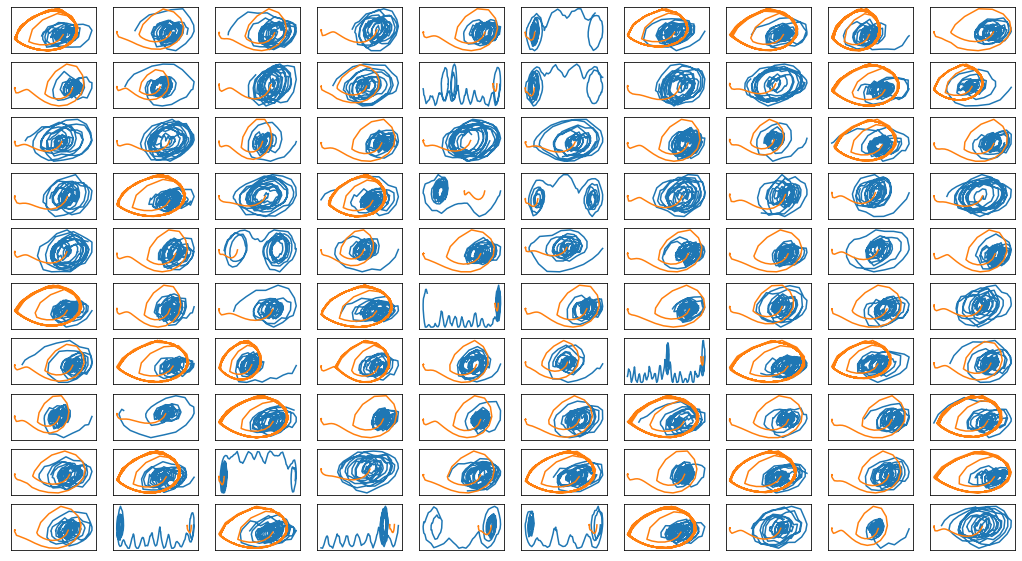

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")

train: iter 0  trainloss 677.34583  validloss 840.01369±0.00000  bestvalidloss 840.01369  last_update 0
train: iter 1  trainloss 489.62476  validloss 491.90058±0.00000  bestvalidloss 491.90058  last_update 0
train: iter 2  trainloss 440.65913  validloss 447.64949±0.00000  bestvalidloss 447.64949  last_update 0
train: iter 3  trainloss 406.97442  validloss 419.07617±0.00000  bestvalidloss 419.07617  last_update 0
train: iter 4  trainloss 384.50447  validloss 392.85952±0.00000  bestvalidloss 392.85952  last_update 0
train: iter 5  trainloss 367.47200  validloss 371.76517±0.00000  bestvalidloss 371.76517  last_update 0
train: iter 6  trainloss 351.21921  validloss 359.59571±0.00000  bestvalidloss 359.59571  last_update 0
train: iter 7  trainloss 335.71807  validloss 345.19516±0.00000  bestvalidloss 345.19516  last_update 0
train: iter 8  trainloss 327.15234  validloss 340.08382±0.00000  bestvalidloss 340.08382  last_update 0
train: iter 9  trainloss 311.55243  validloss 322.55843±0.00000 

train: iter 78  trainloss -349.29737  validloss -225.80281±0.00000  bestvalidloss -275.04767  last_update 4
train: iter 79  trainloss -337.58150  validloss -153.93232±0.00000  bestvalidloss -275.04767  last_update 5
train: iter 80  trainloss -343.76167  validloss -295.21061±0.00000  bestvalidloss -295.21061  last_update 0
train: iter 81  trainloss -370.07249  validloss -232.11183±0.00000  bestvalidloss -295.21061  last_update 1
train: iter 82  trainloss -390.63341  validloss -289.14731±0.00000  bestvalidloss -295.21061  last_update 2
train: iter 83  trainloss -377.06751  validloss -308.25257±0.00000  bestvalidloss -308.25257  last_update 0
train: iter 84  trainloss -389.17518  validloss -323.48238±0.00000  bestvalidloss -323.48238  last_update 0
train: iter 85  trainloss -388.81623  validloss -312.92174±0.00000  bestvalidloss -323.48238  last_update 1
train: iter 86  trainloss -400.22093  validloss -309.88612±0.00000  bestvalidloss -323.48238  last_update 2
train: iter 87  trainloss -4

train: iter 154  trainloss -571.89500  validloss -245.24065±0.00000  bestvalidloss -588.37907  last_update 1
train: iter 155  trainloss -648.61006  validloss -591.71902±0.00000  bestvalidloss -591.71902  last_update 0
train: iter 156  trainloss -628.71078  validloss -557.57952±0.00000  bestvalidloss -591.71902  last_update 1
train: iter 157  trainloss -618.17509  validloss -595.89325±0.00000  bestvalidloss -595.89325  last_update 0
train: iter 158  trainloss -641.42698  validloss -580.38895±0.00000  bestvalidloss -595.89325  last_update 1
train: iter 159  trainloss -619.35227  validloss -540.03218±0.00000  bestvalidloss -595.89325  last_update 2
train: iter 160  trainloss -633.57621  validloss -589.81434±0.00000  bestvalidloss -595.89325  last_update 3
train: iter 161  trainloss -626.13557  validloss -597.86822±0.00000  bestvalidloss -597.86822  last_update 0
train: iter 162  trainloss -659.84968  validloss -600.47621±0.00000  bestvalidloss -600.47621  last_update 0
train: iter 163  tr

train: iter 230  trainloss -725.23128  validloss -631.44004±0.00000  bestvalidloss -671.47018  last_update 8
train: iter 231  trainloss -696.01421  validloss -587.63603±0.00000  bestvalidloss -671.47018  last_update 9
train: iter 232  trainloss -668.84033  validloss -581.36889±0.00000  bestvalidloss -671.47018  last_update 10
train: iter 233  trainloss -715.99014  validloss -676.74548±0.00000  bestvalidloss -676.74548  last_update 0
train: iter 234  trainloss -722.03154  validloss -670.47205±0.00000  bestvalidloss -676.74548  last_update 1
train: iter 235  trainloss -676.37823  validloss -616.15702±0.00000  bestvalidloss -676.74548  last_update 2
train: iter 236  trainloss -719.57671  validloss -617.00161±0.00000  bestvalidloss -676.74548  last_update 3
train: iter 237  trainloss -718.99974  validloss -663.33060±0.00000  bestvalidloss -676.74548  last_update 4
train: iter 238  trainloss -722.51326  validloss -673.49132±0.00000  bestvalidloss -676.74548  last_update 5
train: iter 239  t

train: iter 305  trainloss -744.68834  validloss -694.78621±0.00000  bestvalidloss -702.29996  last_update 26
train: iter 306  trainloss -745.22213  validloss -645.05348±0.00000  bestvalidloss -702.29996  last_update 27
train: iter 307  trainloss -745.17232  validloss -683.05379±0.00000  bestvalidloss -702.29996  last_update 28
train: iter 308  trainloss -759.35948  validloss -680.10833±0.00000  bestvalidloss -702.29996  last_update 29
train: iter 309  trainloss -763.06864  validloss -658.33658±0.00000  bestvalidloss -702.29996  last_update 30
train: iter 310  trainloss -746.69769  validloss -695.64278±0.00000  bestvalidloss -702.29996  last_update 31
train: iter 311  trainloss -691.58477  validloss -635.43985±0.00000  bestvalidloss -702.29996  last_update 32
train: iter 312  trainloss -733.33741  validloss -694.63759±0.00000  bestvalidloss -702.29996  last_update 33
train: iter 313  trainloss -730.61286  validloss -493.13991±0.00000  bestvalidloss -702.29996  last_update 34
train: ite

train: iter 380  trainloss -781.68393  validloss -702.62623±0.00000  bestvalidloss -728.02130  last_update 1
train: iter 381  trainloss -763.70807  validloss -689.89987±0.00000  bestvalidloss -728.02130  last_update 2
train: iter 382  trainloss -776.70326  validloss -603.21896±0.00000  bestvalidloss -728.02130  last_update 3
train: iter 383  trainloss -773.10498  validloss -692.67378±0.00000  bestvalidloss -728.02130  last_update 4
train: iter 384  trainloss -759.32602  validloss -660.05414±0.00000  bestvalidloss -728.02130  last_update 5
train: iter 385  trainloss -792.78484  validloss -702.07294±0.00000  bestvalidloss -728.02130  last_update 6
train: iter 386  trainloss -710.29202  validloss -702.26181±0.00000  bestvalidloss -728.02130  last_update 7
train: iter 387  trainloss -739.30903  validloss -687.98840±0.00000  bestvalidloss -728.02130  last_update 8
train: iter 388  trainloss -773.33309  validloss -677.36942±0.00000  bestvalidloss -728.02130  last_update 9
train: iter 389  tr

train: iter 455  trainloss -802.06259  validloss -729.47640±0.00000  bestvalidloss -750.03548  last_update 4
train: iter 456  trainloss -795.50098  validloss -752.99787±0.00000  bestvalidloss -752.99787  last_update 0
train: iter 457  trainloss -774.34723  validloss -723.33169±0.00000  bestvalidloss -752.99787  last_update 1
train: iter 458  trainloss -779.44928  validloss -691.58720±0.00000  bestvalidloss -752.99787  last_update 2
train: iter 459  trainloss -817.24279  validloss -741.75352±0.00000  bestvalidloss -752.99787  last_update 3
train: iter 460  trainloss -783.89148  validloss -739.85253±0.00000  bestvalidloss -752.99787  last_update 4
train: iter 461  trainloss -800.77674  validloss -742.68155±0.00000  bestvalidloss -752.99787  last_update 5
train: iter 462  trainloss -805.77384  validloss -745.44790±0.00000  bestvalidloss -752.99787  last_update 6
train: iter 463  trainloss -796.00237  validloss -726.22974±0.00000  bestvalidloss -752.99787  last_update 7
train: iter 464  tr

train: iter 530  trainloss -818.19770  validloss -730.41482±0.00000  bestvalidloss -761.50404  last_update 1
train: iter 531  trainloss -816.04879  validloss -697.64983±0.00000  bestvalidloss -761.50404  last_update 2
train: iter 532  trainloss -812.91251  validloss -735.08289±0.00000  bestvalidloss -761.50404  last_update 3
train: iter 533  trainloss -817.45557  validloss -767.09278±0.00000  bestvalidloss -767.09278  last_update 0
train: iter 534  trainloss -810.77725  validloss -764.05881±0.00000  bestvalidloss -767.09278  last_update 1
train: iter 535  trainloss -770.39208  validloss -761.31602±0.00000  bestvalidloss -767.09278  last_update 2
train: iter 536  trainloss -821.25447  validloss -754.95429±0.00000  bestvalidloss -767.09278  last_update 3
train: iter 537  trainloss -815.80361  validloss -754.00843±0.00000  bestvalidloss -767.09278  last_update 4
train: iter 538  trainloss -819.41626  validloss -766.27737±0.00000  bestvalidloss -767.09278  last_update 5
train: iter 539  tr

train: iter 605  trainloss -813.99894  validloss -776.96669±0.00000  bestvalidloss -776.96669  last_update 0
train: iter 606  trainloss -804.96950  validloss -720.99428±0.00000  bestvalidloss -776.96669  last_update 1
train: iter 607  trainloss -827.72307  validloss -760.84901±0.00000  bestvalidloss -776.96669  last_update 2
train: iter 608  trainloss -804.50560  validloss -774.36480±0.00000  bestvalidloss -776.96669  last_update 3
train: iter 609  trainloss -822.23867  validloss -768.45423±0.00000  bestvalidloss -776.96669  last_update 4
train: iter 610  trainloss -822.62075  validloss -747.41412±0.00000  bestvalidloss -776.96669  last_update 5
train: iter 611  trainloss -821.78630  validloss -777.11920±0.00000  bestvalidloss -777.11920  last_update 0
train: iter 612  trainloss -810.06707  validloss -771.05320±0.00000  bestvalidloss -777.11920  last_update 1
train: iter 613  trainloss -811.71732  validloss -773.03575±0.00000  bestvalidloss -777.11920  last_update 2
train: iter 614  tr

train: iter 680  trainloss -837.12790  validloss -784.81736±0.00000  bestvalidloss -788.87022  last_update 10
train: iter 681  trainloss -834.97812  validloss -771.66476±0.00000  bestvalidloss -788.87022  last_update 11
train: iter 682  trainloss -835.48801  validloss -767.40214±0.00000  bestvalidloss -788.87022  last_update 12
train: iter 683  trainloss -825.60595  validloss -791.37861±0.00000  bestvalidloss -791.37861  last_update 0
train: iter 684  trainloss -820.65040  validloss -746.89426±0.00000  bestvalidloss -791.37861  last_update 1
train: iter 685  trainloss -819.31512  validloss -772.86454±0.00000  bestvalidloss -791.37861  last_update 2
train: iter 686  trainloss -840.35865  validloss -748.04121±0.00000  bestvalidloss -791.37861  last_update 3
train: iter 687  trainloss -825.17505  validloss -781.46152±0.00000  bestvalidloss -791.37861  last_update 4
train: iter 688  trainloss -810.49786  validloss -773.09343±0.00000  bestvalidloss -791.37861  last_update 5
train: iter 689 

train: iter 755  trainloss -840.51613  validloss -795.02908±0.00000  bestvalidloss -795.02908  last_update 0
train: iter 756  trainloss -857.82401  validloss -774.80447±0.00000  bestvalidloss -795.02908  last_update 1
train: iter 757  trainloss -839.59125  validloss -792.28643±0.00000  bestvalidloss -795.02908  last_update 2
train: iter 758  trainloss -830.01401  validloss -774.94363±0.00000  bestvalidloss -795.02908  last_update 3
train: iter 759  trainloss -840.26351  validloss -790.84298±0.00000  bestvalidloss -795.02908  last_update 4
train: iter 760  trainloss -836.48623  validloss -789.49925±0.00000  bestvalidloss -795.02908  last_update 5
train: iter 761  trainloss -843.19423  validloss -753.25691±0.00000  bestvalidloss -795.02908  last_update 6
train: iter 762  trainloss -844.60273  validloss -791.30288±0.00000  bestvalidloss -795.02908  last_update 7
train: iter 763  trainloss -833.40523  validloss -733.61176±0.00000  bestvalidloss -795.02908  last_update 8
train: iter 764  tr

train: iter 830  trainloss -840.25275  validloss -777.02163±0.00000  bestvalidloss -805.95837  last_update 6
train: iter 831  trainloss -834.07314  validloss -762.32817±0.00000  bestvalidloss -805.95837  last_update 7
train: iter 832  trainloss -677.09177  validloss -779.77206±0.00000  bestvalidloss -805.95837  last_update 8
train: iter 833  trainloss -785.38089  validloss -644.75877±0.00000  bestvalidloss -805.95837  last_update 9
train: iter 834  trainloss -829.31641  validloss -768.71241±0.00000  bestvalidloss -805.95837  last_update 10
train: iter 835  trainloss -849.79730  validloss -781.25207±0.00000  bestvalidloss -805.95837  last_update 11
train: iter 836  trainloss -828.26056  validloss -750.73544±0.00000  bestvalidloss -805.95837  last_update 12
train: iter 837  trainloss -844.40239  validloss -792.72378±0.00000  bestvalidloss -805.95837  last_update 13
train: iter 838  trainloss -838.02685  validloss -787.50271±0.00000  bestvalidloss -805.95837  last_update 14
train: iter 83

train: iter 905  trainloss -808.08633  validloss -619.58418±0.00000  bestvalidloss -810.80268  last_update 20
train: iter 906  trainloss -845.42874  validloss -810.89175±0.00000  bestvalidloss -810.89175  last_update 0
train: iter 907  trainloss -858.97037  validloss -800.68041±0.00000  bestvalidloss -810.89175  last_update 1
train: iter 908  trainloss -857.67218  validloss -816.48753±0.00000  bestvalidloss -816.48753  last_update 0
train: iter 909  trainloss -819.40559  validloss -779.52281±0.00000  bestvalidloss -816.48753  last_update 1
train: iter 910  trainloss -844.80308  validloss -769.10381±0.00000  bestvalidloss -816.48753  last_update 2
train: iter 911  trainloss -844.90582  validloss -805.64346±0.00000  bestvalidloss -816.48753  last_update 3
train: iter 912  trainloss -850.74293  validloss -750.31422±0.00000  bestvalidloss -816.48753  last_update 4
train: iter 913  trainloss -841.01603  validloss -796.94096±0.00000  bestvalidloss -816.48753  last_update 5
train: iter 914  t

train: iter 980  trainloss -858.01049  validloss -793.27029±0.00000  bestvalidloss -819.26804  last_update 8
train: iter 981  trainloss -858.91754  validloss -804.91828±0.00000  bestvalidloss -819.26804  last_update 9
train: iter 982  trainloss -864.64665  validloss -772.33201±0.00000  bestvalidloss -819.26804  last_update 10
train: iter 983  trainloss -864.86835  validloss -812.30659±0.00000  bestvalidloss -819.26804  last_update 11
train: iter 984  trainloss -868.83518  validloss -793.42798±0.00000  bestvalidloss -819.26804  last_update 12
train: iter 985  trainloss -861.76974  validloss -811.55161±0.00000  bestvalidloss -819.26804  last_update 13
train: iter 986  trainloss -841.52227  validloss -779.51316±0.00000  bestvalidloss -819.26804  last_update 14
train: iter 987  trainloss -854.95594  validloss -802.17298±0.00000  bestvalidloss -819.26804  last_update 15
train: iter 988  trainloss -835.21395  validloss -785.66069±0.00000  bestvalidloss -819.26804  last_update 16
train: iter 

train: iter 1055  trainloss -872.91924  validloss -817.18032±0.00000  bestvalidloss -824.30952  last_update 21
train: iter 1056  trainloss -853.62497  validloss -797.40356±0.00000  bestvalidloss -824.30952  last_update 22
train: iter 1057  trainloss -851.45554  validloss -804.65515±0.00000  bestvalidloss -824.30952  last_update 23
train: iter 1058  trainloss -867.99312  validloss -823.93828±0.00000  bestvalidloss -824.30952  last_update 24
train: iter 1059  trainloss -864.30223  validloss -801.32608±0.00000  bestvalidloss -824.30952  last_update 25
train: iter 1060  trainloss -865.05388  validloss -820.25079±0.00000  bestvalidloss -824.30952  last_update 26
train: iter 1061  trainloss -866.60771  validloss -737.87861±0.00000  bestvalidloss -824.30952  last_update 27
train: iter 1062  trainloss -855.97373  validloss -817.23172±0.00000  bestvalidloss -824.30952  last_update 28
train: iter 1063  trainloss -870.60741  validloss -793.07640±0.00000  bestvalidloss -824.30952  last_update 29
t

train: iter 1130  trainloss -876.40164  validloss -798.71540±0.00000  bestvalidloss -828.30810  last_update 2
train: iter 1131  trainloss -865.08408  validloss -750.83543±0.00000  bestvalidloss -828.30810  last_update 3
train: iter 1132  trainloss -815.03788  validloss -437.30001±0.00000  bestvalidloss -828.30810  last_update 4
train: iter 1133  trainloss -881.23751  validloss -761.14057±0.00000  bestvalidloss -828.30810  last_update 5
train: iter 1134  trainloss -882.23522  validloss -807.42099±0.00000  bestvalidloss -828.30810  last_update 6
train: iter 1135  trainloss -873.44395  validloss -814.84434±0.00000  bestvalidloss -828.30810  last_update 7
train: iter 1136  trainloss -890.13014  validloss -807.40711±0.00000  bestvalidloss -828.30810  last_update 8
train: iter 1137  trainloss -878.96478  validloss -822.67288±0.00000  bestvalidloss -828.30810  last_update 9
train: iter 1138  trainloss -866.12649  validloss -785.96547±0.00000  bestvalidloss -828.30810  last_update 10
train: it

train: iter 1205  trainloss -883.95072  validloss -796.28536±0.00000  bestvalidloss -845.77257  last_update 2
train: iter 1206  trainloss -893.99356  validloss -837.27360±0.00000  bestvalidloss -845.77257  last_update 3
train: iter 1207  trainloss -887.01384  validloss -773.86327±0.00000  bestvalidloss -845.77257  last_update 4
train: iter 1208  trainloss -898.80917  validloss -849.19421±0.00000  bestvalidloss -849.19421  last_update 0
train: iter 1209  trainloss -886.58759  validloss -846.40387±0.00000  bestvalidloss -849.19421  last_update 1
train: iter 1210  trainloss -896.99624  validloss -822.52820±0.00000  bestvalidloss -849.19421  last_update 2
train: iter 1211  trainloss -900.99849  validloss -829.42145±0.00000  bestvalidloss -849.19421  last_update 3
train: iter 1212  trainloss -895.61943  validloss -833.90599±0.00000  bestvalidloss -849.19421  last_update 4
train: iter 1213  trainloss -909.87392  validloss -835.66785±0.00000  bestvalidloss -849.19421  last_update 5
train: ite

train: iter 1280  trainloss -937.57552  validloss -881.05680±0.00000  bestvalidloss -908.63131  last_update 8
train: iter 1281  trainloss -937.87942  validloss -909.38200±0.00000  bestvalidloss -909.38200  last_update 0
train: iter 1282  trainloss -950.93405  validloss -871.70724±0.00000  bestvalidloss -909.38200  last_update 1
train: iter 1283  trainloss -934.34359  validloss -899.52578±0.00000  bestvalidloss -909.38200  last_update 2
train: iter 1284  trainloss -955.85728  validloss -859.87753±0.00000  bestvalidloss -909.38200  last_update 3
train: iter 1285  trainloss -955.36771  validloss -890.04731±0.00000  bestvalidloss -909.38200  last_update 4
train: iter 1286  trainloss -905.33606  validloss -850.64689±0.00000  bestvalidloss -909.38200  last_update 5
train: iter 1287  trainloss -938.17136  validloss -742.53175±0.00000  bestvalidloss -909.38200  last_update 6
train: iter 1288  trainloss -918.84258  validloss -751.31960±0.00000  bestvalidloss -909.38200  last_update 7
train: ite

train: iter 1355  trainloss -984.68102  validloss -853.54228±0.00000  bestvalidloss -964.89476  last_update 2
train: iter 1356  trainloss -1005.39271  validloss -956.96043±0.00000  bestvalidloss -964.89476  last_update 3
train: iter 1357  trainloss -977.12049  validloss -961.11377±0.00000  bestvalidloss -964.89476  last_update 4
train: iter 1358  trainloss -1008.03843  validloss -956.66839±0.00000  bestvalidloss -964.89476  last_update 5
train: iter 1359  trainloss -1006.49597  validloss -931.32064±0.00000  bestvalidloss -964.89476  last_update 6
train: iter 1360  trainloss -1016.07972  validloss -960.20030±0.00000  bestvalidloss -964.89476  last_update 7
train: iter 1361  trainloss -979.22434  validloss -739.49478±0.00000  bestvalidloss -964.89476  last_update 8
train: iter 1362  trainloss -960.89426  validloss -725.22894±0.00000  bestvalidloss -964.89476  last_update 9
train: iter 1363  trainloss -980.30424  validloss -799.33826±0.00000  bestvalidloss -964.89476  last_update 10
train

train: iter 1429  trainloss -1028.05629  validloss -984.74299±0.00000  bestvalidloss -994.71534  last_update 17
train: iter 1430  trainloss -1043.76549  validloss -995.58538±0.00000  bestvalidloss -995.58538  last_update 0
train: iter 1431  trainloss -1022.50531  validloss -933.27389±0.00000  bestvalidloss -995.58538  last_update 1
train: iter 1432  trainloss -1029.92589  validloss -948.05617±0.00000  bestvalidloss -995.58538  last_update 2
train: iter 1433  trainloss -1018.59170  validloss -985.98392±0.00000  bestvalidloss -995.58538  last_update 3
train: iter 1434  trainloss -1036.05168  validloss -1002.63188±0.00000  bestvalidloss -1002.63188  last_update 0
train: iter 1435  trainloss -987.33299  validloss -928.25674±0.00000  bestvalidloss -1002.63188  last_update 1
train: iter 1436  trainloss -1032.38599  validloss -995.90097±0.00000  bestvalidloss -1002.63188  last_update 2
train: iter 1437  trainloss -1022.92575  validloss -979.84899±0.00000  bestvalidloss -1002.63188  last_updat

train: iter 1502  trainloss -1009.35410  validloss -985.03444±0.00000  bestvalidloss -1015.45215  last_update 16
train: iter 1503  trainloss -1064.32632  validloss -1002.61097±0.00000  bestvalidloss -1015.45215  last_update 17
train: iter 1504  trainloss -1050.25392  validloss -981.71825±0.00000  bestvalidloss -1015.45215  last_update 18
train: iter 1505  trainloss -1053.64788  validloss -993.15159±0.00000  bestvalidloss -1015.45215  last_update 19
train: iter 1506  trainloss -1059.27670  validloss -1001.88419±0.00000  bestvalidloss -1015.45215  last_update 20
train: iter 1507  trainloss -1040.59199  validloss -1007.72599±0.00000  bestvalidloss -1015.45215  last_update 21
train: iter 1508  trainloss -1044.69253  validloss -998.90080±0.00000  bestvalidloss -1015.45215  last_update 22
train: iter 1509  trainloss -1038.47129  validloss -898.75995±0.00000  bestvalidloss -1015.45215  last_update 23
train: iter 1510  trainloss -1061.13341  validloss -974.32141±0.00000  bestvalidloss -1015.45

train: iter 1575  trainloss -1059.97464  validloss -1024.10563±0.00000  bestvalidloss -1024.10563  last_update 0
train: iter 1576  trainloss -1073.32395  validloss -972.93478±0.00000  bestvalidloss -1024.10563  last_update 1
train: iter 1577  trainloss -960.12538  validloss -983.13767±0.00000  bestvalidloss -1024.10563  last_update 2
train: iter 1578  trainloss -1041.13326  validloss -954.31988±0.00000  bestvalidloss -1024.10563  last_update 3
train: iter 1579  trainloss -1052.13142  validloss -943.02100±0.00000  bestvalidloss -1024.10563  last_update 4
train: iter 1580  trainloss -1077.42654  validloss -1020.70208±0.00000  bestvalidloss -1024.10563  last_update 5
train: iter 1581  trainloss -999.09884  validloss -1016.17655±0.00000  bestvalidloss -1024.10563  last_update 6
train: iter 1582  trainloss -1005.27150  validloss -953.04797±0.00000  bestvalidloss -1024.10563  last_update 7
train: iter 1583  trainloss -1088.70352  validloss -1011.39402±0.00000  bestvalidloss -1024.10563  last

train: iter 1648  trainloss -1081.04553  validloss -968.39371±0.00000  bestvalidloss -1043.78383  last_update 4
train: iter 1649  trainloss -1060.16723  validloss -957.28986±0.00000  bestvalidloss -1043.78383  last_update 5
train: iter 1650  trainloss -1085.11818  validloss -1016.08098±0.00000  bestvalidloss -1043.78383  last_update 6
train: iter 1651  trainloss -1106.55125  validloss -1005.58816±0.00000  bestvalidloss -1043.78383  last_update 7
train: iter 1652  trainloss -1095.58609  validloss -1002.48837±0.00000  bestvalidloss -1043.78383  last_update 8
train: iter 1653  trainloss -1032.70814  validloss -886.18459±0.00000  bestvalidloss -1043.78383  last_update 9
train: iter 1654  trainloss -1101.41843  validloss -1018.00031±0.00000  bestvalidloss -1043.78383  last_update 10
train: iter 1655  trainloss -1103.54646  validloss -1000.17167±0.00000  bestvalidloss -1043.78383  last_update 11
train: iter 1656  trainloss -1041.92298  validloss -990.01400±0.00000  bestvalidloss -1043.78383 

train: iter 1721  trainloss -1086.02928  validloss -951.23209±0.00000  bestvalidloss -1057.61465  last_update 3
train: iter 1722  trainloss -1121.95946  validloss -1055.55352±0.00000  bestvalidloss -1057.61465  last_update 4
train: iter 1723  trainloss -1071.89271  validloss -1002.40139±0.00000  bestvalidloss -1057.61465  last_update 5
train: iter 1724  trainloss -1032.55967  validloss -600.78048±0.00000  bestvalidloss -1057.61465  last_update 6
train: iter 1725  trainloss -1125.20287  validloss -1018.04458±0.00000  bestvalidloss -1057.61465  last_update 7
train: iter 1726  trainloss -1117.36238  validloss -1012.78063±0.00000  bestvalidloss -1057.61465  last_update 8
train: iter 1727  trainloss -1131.55215  validloss -1055.89510±0.00000  bestvalidloss -1057.61465  last_update 9
train: iter 1728  trainloss -1095.31467  validloss -1046.26798±0.00000  bestvalidloss -1057.61465  last_update 10
train: iter 1729  trainloss -1078.69855  validloss -1003.39958±0.00000  bestvalidloss -1057.61465

train: iter 1794  trainloss -1132.62688  validloss -1060.45566±0.00000  bestvalidloss -1078.29468  last_update 35
train: iter 1795  trainloss -1132.61392  validloss -1074.25835±0.00000  bestvalidloss -1078.29468  last_update 36
train: iter 1796  trainloss -1112.19442  validloss -1051.43239±0.00000  bestvalidloss -1078.29468  last_update 37
train: iter 1797  trainloss -1132.73336  validloss -1047.68601±0.00000  bestvalidloss -1078.29468  last_update 38
train: iter 1798  trainloss -1096.38275  validloss -1074.49902±0.00000  bestvalidloss -1078.29468  last_update 39
train: iter 1799  trainloss -1123.24504  validloss -1083.46326±0.00000  bestvalidloss -1083.46326  last_update 0
train: iter 1800  trainloss -969.85207  validloss -1043.59958±0.00000  bestvalidloss -1083.46326  last_update 1
train: iter 1801  trainloss -1121.80803  validloss -1012.00192±0.00000  bestvalidloss -1083.46326  last_update 2
train: iter 1802  trainloss -1142.33546  validloss -1081.34708±0.00000  bestvalidloss -1083.

train: iter 1867  trainloss -1153.24752  validloss -998.13776±0.00000  bestvalidloss -1085.28402  last_update 14
train: iter 1868  trainloss -1153.60085  validloss -1083.87586±0.00000  bestvalidloss -1085.28402  last_update 15
train: iter 1869  trainloss -1134.43572  validloss -986.98478±0.00000  bestvalidloss -1085.28402  last_update 16
train: iter 1870  trainloss -1127.40281  validloss -928.57444±0.00000  bestvalidloss -1085.28402  last_update 17
train: iter 1871  trainloss -1142.92774  validloss -964.41124±0.00000  bestvalidloss -1085.28402  last_update 18
train: iter 1872  trainloss -1022.39076  validloss -945.00923±0.00000  bestvalidloss -1085.28402  last_update 19
train: iter 1873  trainloss -1098.58576  validloss -983.84401±0.00000  bestvalidloss -1085.28402  last_update 20
train: iter 1874  trainloss -1147.04864  validloss -1074.51893±0.00000  bestvalidloss -1085.28402  last_update 21
train: iter 1875  trainloss -1132.93560  validloss -1041.36033±0.00000  bestvalidloss -1085.28

train: iter 1940  trainloss -1115.37159  validloss -1023.07050±0.00000  bestvalidloss -1088.50281  last_update 23
train: iter 1941  trainloss -1143.10177  validloss -1038.77075±0.00000  bestvalidloss -1088.50281  last_update 24
train: iter 1942  trainloss -1129.50880  validloss -1031.62786±0.00000  bestvalidloss -1088.50281  last_update 25
train: iter 1943  trainloss -1126.40367  validloss -911.84490±0.00000  bestvalidloss -1088.50281  last_update 26
train: iter 1944  trainloss -1160.10898  validloss -1092.07856±0.00000  bestvalidloss -1092.07856  last_update 0
train: iter 1945  trainloss -1137.42833  validloss -977.58590±0.00000  bestvalidloss -1092.07856  last_update 1
train: iter 1946  trainloss -1109.75543  validloss -1038.79730±0.00000  bestvalidloss -1092.07856  last_update 2
train: iter 1947  trainloss -1122.97197  validloss -930.62732±0.00000  bestvalidloss -1092.07856  last_update 3
train: iter 1948  trainloss -1165.42188  validloss -1050.86506±0.00000  bestvalidloss -1092.078

train: iter 2013  trainloss -1143.16489  validloss -972.93594±0.00000  bestvalidloss -1096.72860  last_update 24
train: iter 2014  trainloss -1171.92782  validloss -1039.27743±0.00000  bestvalidloss -1096.72860  last_update 25
train: iter 2015  trainloss -1148.16362  validloss -965.33015±0.00000  bestvalidloss -1096.72860  last_update 26
train: iter 2016  trainloss -1108.86088  validloss -836.50914±0.00000  bestvalidloss -1096.72860  last_update 27
train: iter 2017  trainloss -1172.76722  validloss -1088.02633±0.00000  bestvalidloss -1096.72860  last_update 28
train: iter 2018  trainloss -1127.87280  validloss -972.21553±0.00000  bestvalidloss -1096.72860  last_update 29
train: iter 2019  trainloss -1144.84283  validloss -1020.50870±0.00000  bestvalidloss -1096.72860  last_update 30
train: iter 2020  trainloss -1140.79925  validloss -1036.48943±0.00000  bestvalidloss -1096.72860  last_update 31
train: iter 2021  trainloss -1130.22833  validloss -1041.33280±0.00000  bestvalidloss -1096.

train: iter 2086  trainloss -1115.93314  validloss -1010.62794±0.00000  bestvalidloss -1109.82544  last_update 18
train: iter 2087  trainloss -1113.56710  validloss -945.88344±0.00000  bestvalidloss -1109.82544  last_update 19
train: iter 2088  trainloss -1179.10085  validloss -1071.94561±0.00000  bestvalidloss -1109.82544  last_update 20
train: iter 2089  trainloss -1165.29382  validloss -1085.44100±0.00000  bestvalidloss -1109.82544  last_update 21
train: iter 2090  trainloss -1175.75213  validloss -918.85608±0.00000  bestvalidloss -1109.82544  last_update 22
train: iter 2091  trainloss -1097.73196  validloss -1093.15905±0.00000  bestvalidloss -1109.82544  last_update 23
train: iter 2092  trainloss -1086.45727  validloss -996.04666±0.00000  bestvalidloss -1109.82544  last_update 24
train: iter 2093  trainloss -1169.30213  validloss -967.68871±0.00000  bestvalidloss -1109.82544  last_update 25
train: iter 2094  trainloss -1178.64180  validloss -1030.36580±0.00000  bestvalidloss -1109.

train: iter 2159  trainloss -1180.18982  validloss -994.54207±0.00000  bestvalidloss -1110.91626  last_update 4
train: iter 2160  trainloss -1149.54532  validloss -996.43429±0.00000  bestvalidloss -1110.91626  last_update 5
train: iter 2161  trainloss -1172.96502  validloss -1029.23845±0.00000  bestvalidloss -1110.91626  last_update 6
train: iter 2162  trainloss -1142.78962  validloss -1019.82257±0.00000  bestvalidloss -1110.91626  last_update 7
train: iter 2163  trainloss -1140.42148  validloss -1048.89371±0.00000  bestvalidloss -1110.91626  last_update 8
train: iter 2164  trainloss -1164.05331  validloss -978.14045±0.00000  bestvalidloss -1110.91626  last_update 9
train: iter 2165  trainloss -1180.17106  validloss -1101.71602±0.00000  bestvalidloss -1110.91626  last_update 10
train: iter 2166  trainloss -1088.66349  validloss -903.67785±0.00000  bestvalidloss -1110.91626  last_update 11
train: iter 2167  trainloss -1128.41277  validloss -1037.02137±0.00000  bestvalidloss -1110.91626 

train: iter 2232  trainloss -1172.26665  validloss -1067.42486±0.00000  bestvalidloss -1121.52146  last_update 28
train: iter 2233  trainloss -1176.86088  validloss -1106.64686±0.00000  bestvalidloss -1121.52146  last_update 29
train: iter 2234  trainloss -1122.43019  validloss -1084.76183±0.00000  bestvalidloss -1121.52146  last_update 30
train: iter 2235  trainloss -1149.94175  validloss -963.35446±0.00000  bestvalidloss -1121.52146  last_update 31
train: iter 2236  trainloss -1186.57355  validloss -1046.08672±0.00000  bestvalidloss -1121.52146  last_update 32
train: iter 2237  trainloss -1183.35800  validloss -1082.37526±0.00000  bestvalidloss -1121.52146  last_update 33
train: iter 2238  trainloss -1174.10173  validloss -1060.86989±0.00000  bestvalidloss -1121.52146  last_update 34
train: iter 2239  trainloss -1192.82017  validloss -1007.13849±0.00000  bestvalidloss -1121.52146  last_update 35
train: iter 2240  trainloss -1168.88530  validloss -790.96367±0.00000  bestvalidloss -112

train: iter 2305  trainloss -1140.79473  validloss -1009.32651±0.00000  bestvalidloss -1126.82600  last_update 21
train: iter 2306  trainloss -1174.62069  validloss -1057.08440±0.00000  bestvalidloss -1126.82600  last_update 22
train: iter 2307  trainloss -1172.22153  validloss -1018.45773±0.00000  bestvalidloss -1126.82600  last_update 23
train: iter 2308  trainloss -1175.15362  validloss -857.65286±0.00000  bestvalidloss -1126.82600  last_update 24
train: iter 2309  trainloss -1132.06794  validloss -1090.46731±0.00000  bestvalidloss -1126.82600  last_update 25
train: iter 2310  trainloss -1186.28779  validloss -1102.20288±0.00000  bestvalidloss -1126.82600  last_update 26
train: iter 2311  trainloss -1185.67146  validloss -990.28137±0.00000  bestvalidloss -1126.82600  last_update 27
train: iter 2312  trainloss -1162.54348  validloss -1092.29343±0.00000  bestvalidloss -1126.82600  last_update 28
train: iter 2313  trainloss -1143.24581  validloss -954.94573±0.00000  bestvalidloss -1126

train: iter 2378  trainloss -1203.61562  validloss -1048.14457±0.00000  bestvalidloss -1126.82600  last_update 94
train: iter 2379  trainloss -1178.70372  validloss -960.79327±0.00000  bestvalidloss -1126.82600  last_update 95
train: iter 2380  trainloss -1147.33954  validloss -955.77367±0.00000  bestvalidloss -1126.82600  last_update 96
train: iter 2381  trainloss -1161.39554  validloss -1096.83916±0.00000  bestvalidloss -1126.82600  last_update 97
train: iter 2382  trainloss -1190.08763  validloss -1046.30460±0.00000  bestvalidloss -1126.82600  last_update 98
train: iter 2383  trainloss -1105.50655  validloss -993.28086±0.00000  bestvalidloss -1126.82600  last_update 99
train: iter 2384  trainloss -1193.43112  validloss -1077.63117±0.00000  bestvalidloss -1126.82600  last_update 100
train: fin


(-2000.0, 1000.0)

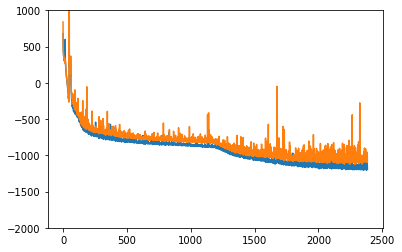

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])

In [10]:
vi.load()
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()

load vi_base_ckpt


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

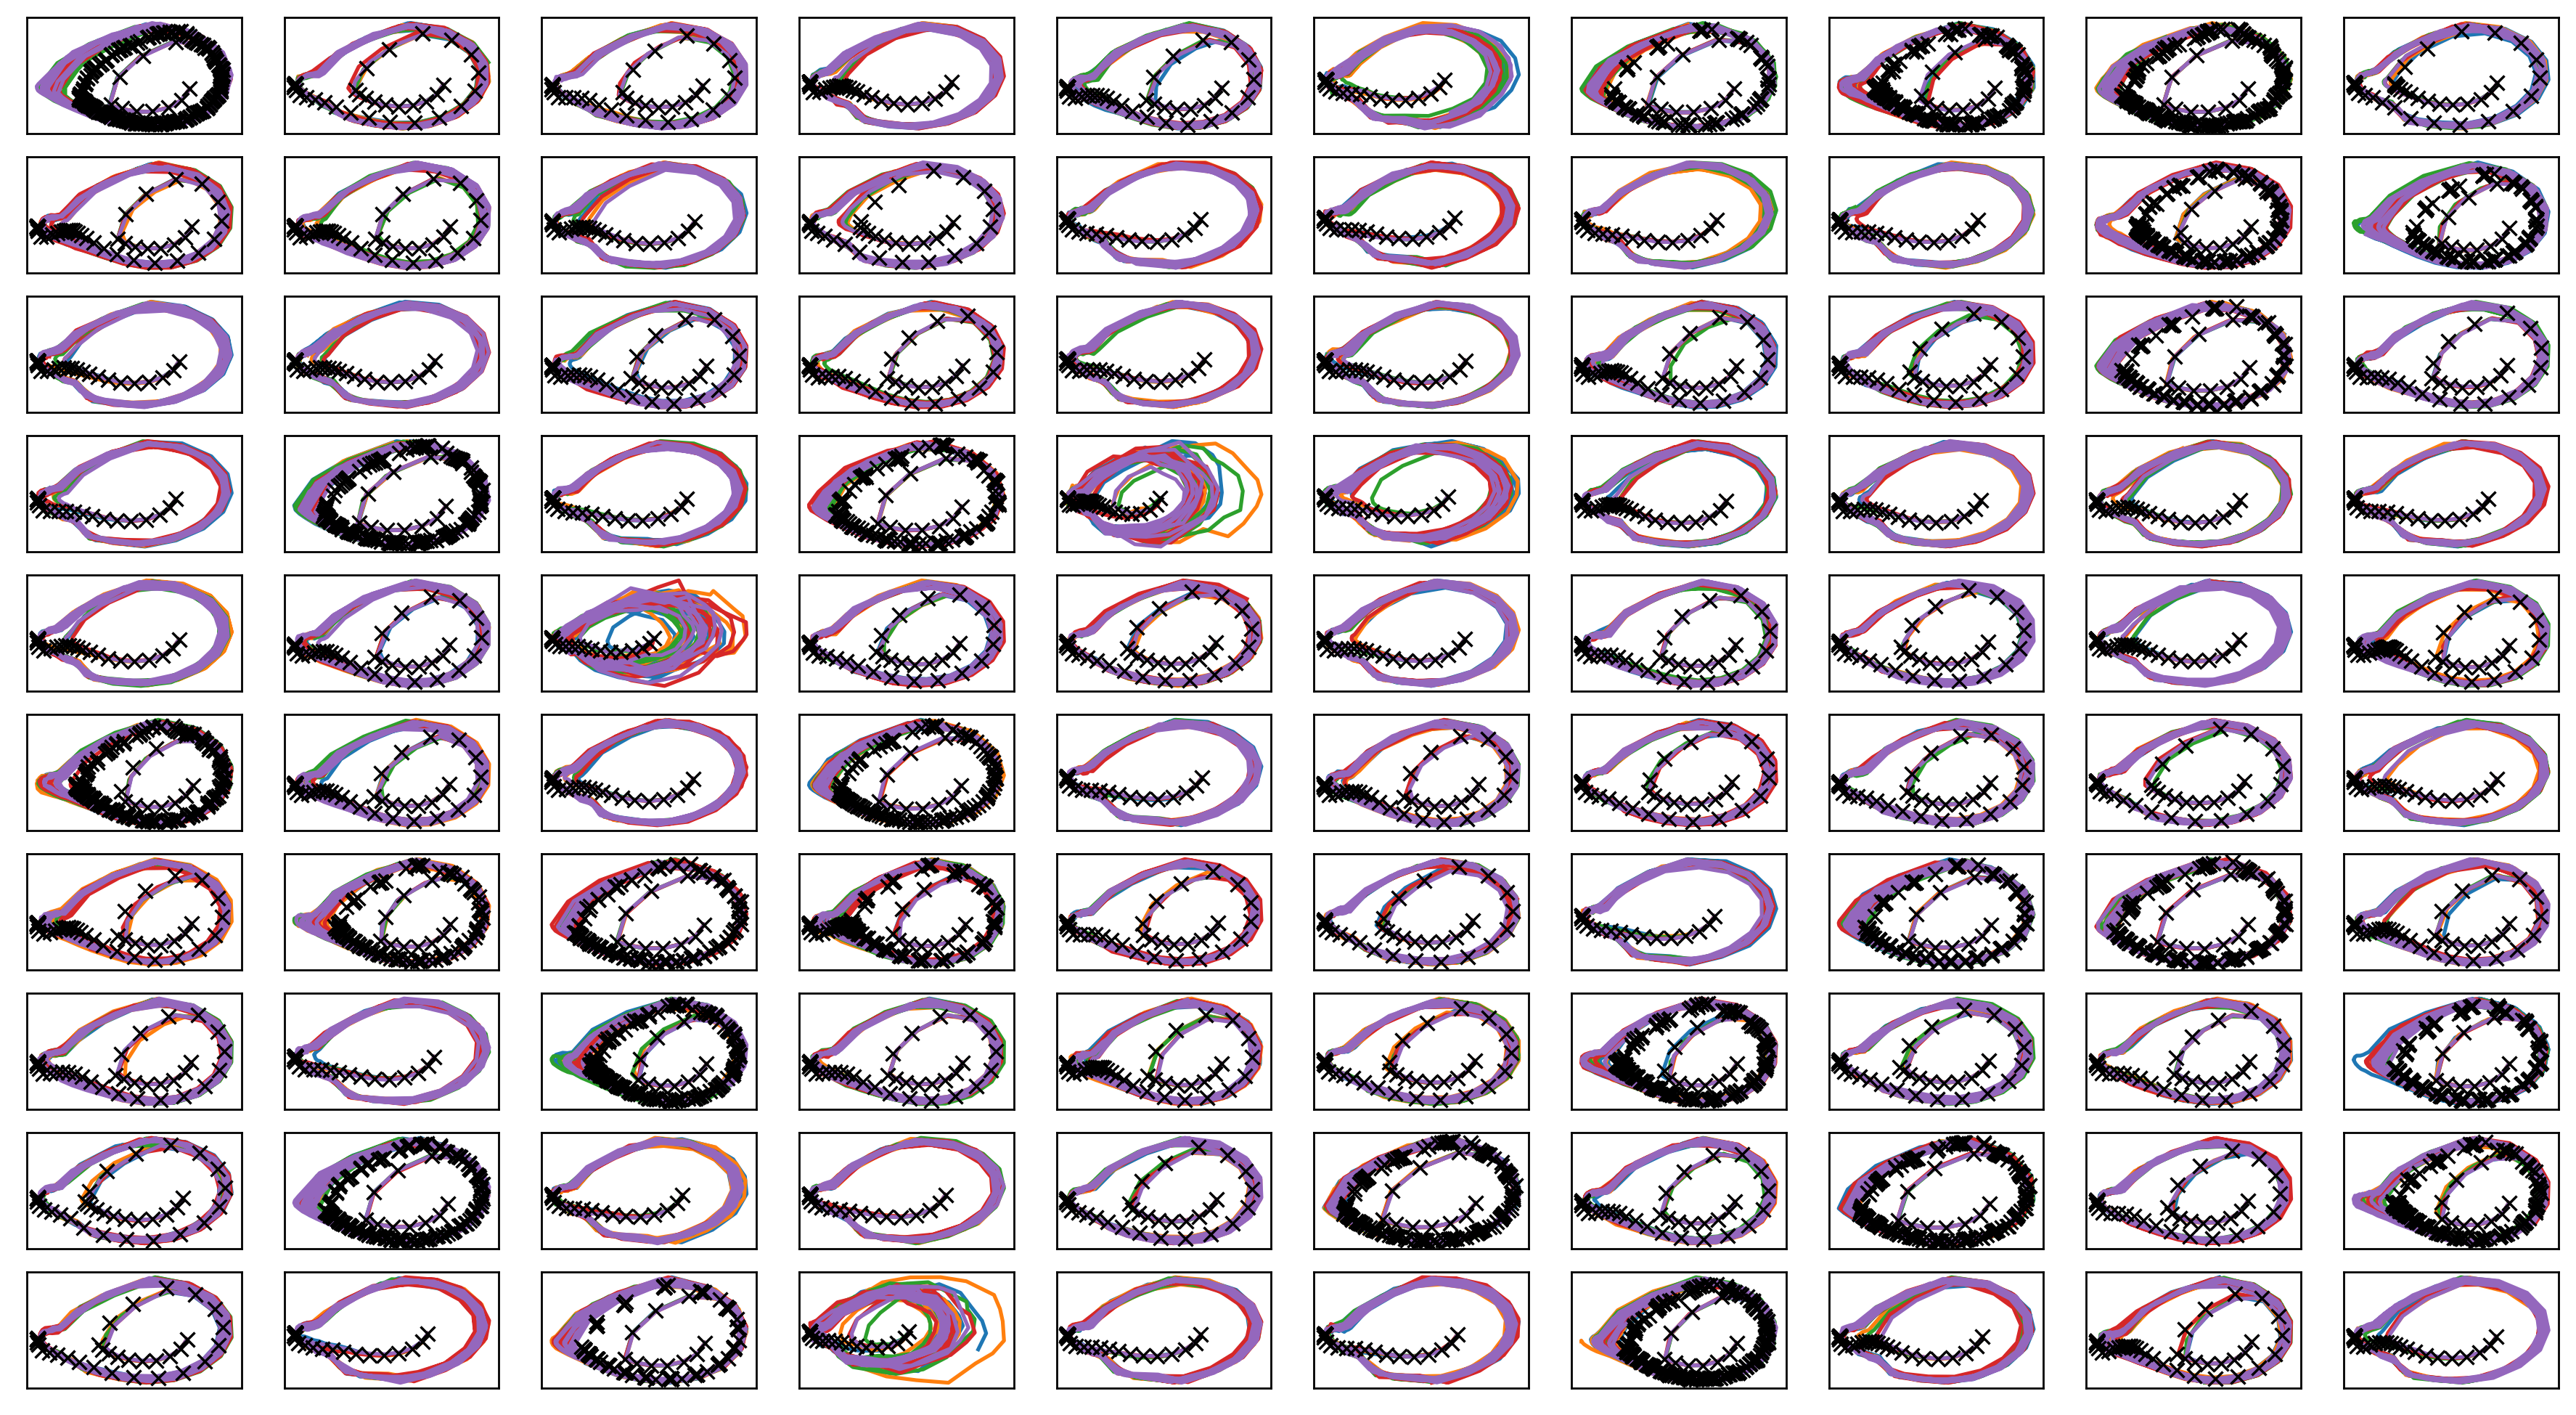

In [11]:
vi.get_sim_rollout_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen()
simdata4 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen()
simdata5 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(simdata4[i][:,0], simdata4[i][:,1]) 
    ax_list[-1].plot(simdata5[i][:,0], simdata5[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("two_stage.png")

print("実環境方策rollout vs Sim環境方策rollout")

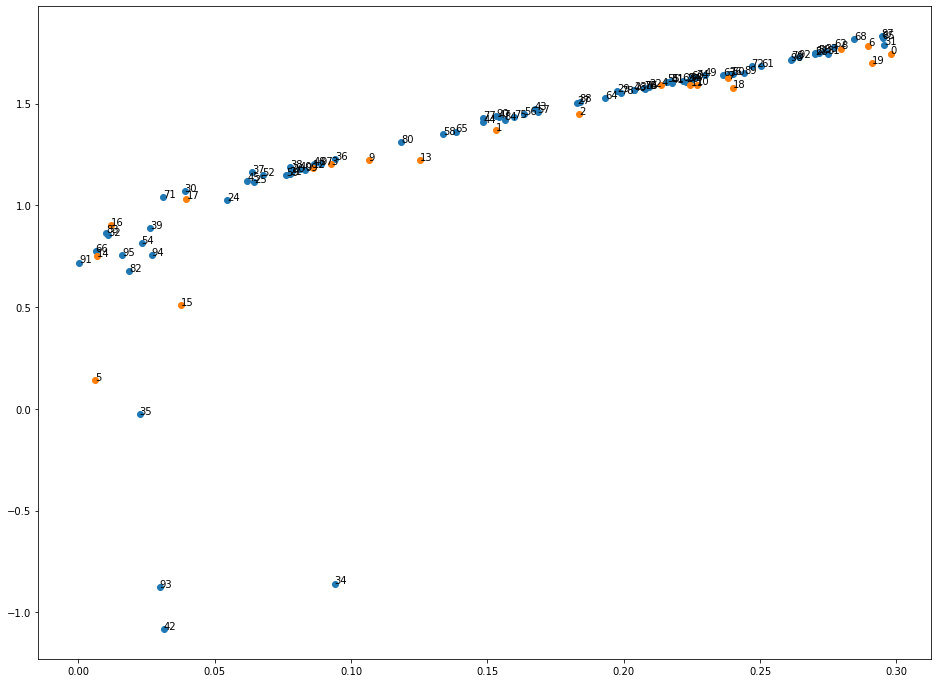

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = []
for i in range(len(vi.mulogvar_list_for_mixture_of_gaussian_belief)):
    np_mulogvar.append(vi.mulogvar_list_for_mixture_of_gaussian_belief[i].numpy())
np_mulogvar = np.array(np_mulogvar)

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-標準偏差


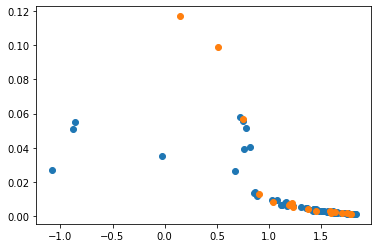

In [13]:
plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
print("平均-標準偏差")